In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [45]:
import pandas as pd
import glob
import numpy as np
from fastai.vision import *
from fastai.layers import *
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
pd.set_option('display.max_columns', 500)
from metrics import *
#from FocalLost import *

In [51]:
torch.cuda.is_available()

False

**Creating databunch**

In [3]:
path = Path('data/data-fellow-ai/celeba-face-image')

In [4]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=30, max_lighting=0.3)

In [5]:
data = ImageDataBunch.from_csv(path,csv_labels='face_image_label.csv',ds_tfms=tfms,size=128,fn_col=1,label_col=2,label_delim=',')

In [6]:
data

ImageDataBunch;

Train: LabelList (140496 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
Attractive;Bangs;Brown_Hair;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Smiling;Wearing_Lipstick;Young,Arched_Eyebrows;Attractive;Big_Lips;Brown_Hair;Heavy_Makeup;Mouth_Slightly_Open;No_Beard;Oval_Face;Pointy_Nose;Wavy_Hair;Wearing_Lipstick;Young,Attractive;Big_Lips;Blond_Hair;Narrow_Eyes;No_Beard;Pointy_Nose;Wavy_Hair;Wearing_Lipstick;Young,Attractive;Big_Nose;Black_Hair;Bushy_Eyebrows;High_Cheekbones;Male;Mouth_Slightly_Open;Narrow_Eyes;No_Beard;Oval_Face;Pointy_Nose;Smiling;Young,Attractive;Black_Hair;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Oval_Face;Pointy_Nose;Smiling;Wavy_Hair;Young
Path: data/data-fellow-ai/celeba-face-image;

Valid: LabelList (35124 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
Attr

In [7]:
print(data.c,'\n',data.classes)

40 
 ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


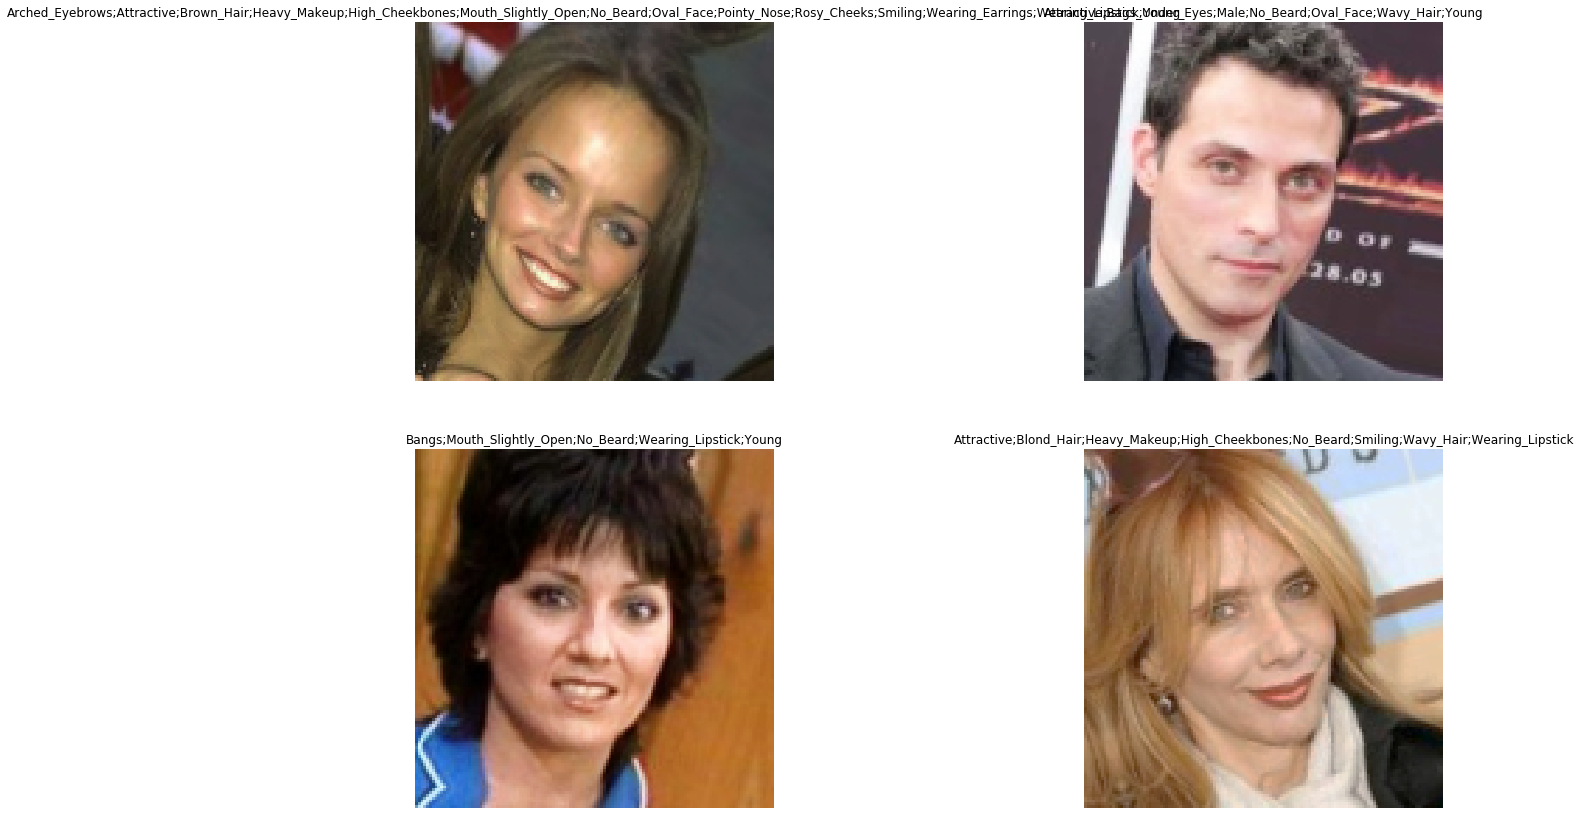

In [8]:
data.show_batch(rows=2, figsize=(20,12))

**Model**

ArcFace custom head function

Model

In [46]:
# Test for ArcMarginProduct in layers.py
num_classes = 40
arc_face_head = nn.Sequential(
AdaptiveConcatPool2d(1),
Flatten(),
nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
nn.Dropout(p=0.25),
nn.Linear(in_features=1024, out_features=512, bias=True),
relu(inplace=True),
nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
nn.Dropout(p=0.5),
nn.Linear(in_features=512, out_features=512, bias=True),
ArcMarginProduct(in_features=512,out_features=num_classes,label=data.classes))

In [47]:
arch = models.resnet34

In [ ]:
# acc_02 = partial(accuracy_thresh, thresh=0.2)
# acc_03 = partial(accuracy_thresh, thresh=0.3)
# acc_04 = partial(accuracy_thresh, thresh=0.4)
# acc_05 = partial(accuracy_thresh, thresh=0.5)
# f_score = partial(fbeta, thresh=0.2)

In [48]:
learn = cnn_learner(data, arch,custom_head=arc_face_head)

In [49]:
learn.loss_func = nn.CrossEntropyLoss()

In [13]:
print(learn.summary)

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (140496 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
Attractive;Bangs;Brown_Hair;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Smiling;Wearing_Lipstick;Young,Arched_Eyebrows;Attractive;Big_Lips;Brown_Hair;Heavy_Makeup;Mouth_Slightly_Open;No_Beard;Oval_Face;Pointy_Nose;Wavy_Hair;Wearing_Lipstick;Young,Attractive;Big_Lips;Blond_Hair;Narrow_Eyes;No_Beard;Pointy_Nose;Wavy_Hair;Wearing_Lipstick;Young,Attractive;Big_Nose;Black_Hair;Bushy_Eyebrows;High_Cheekbones;Male;Mouth_Slightly_Open;Narrow_Eyes;No_Beard;Oval_Face;Pointy_Nose;Smiling;Young,Attractive;Black_Hair;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Oval_Face;Pointy_Nose;Smiling;Wavy_Hair;Young
Path: data/data-fellow-ai/celeba-face-image;

Valid: LabelList (35124 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),I

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

Test adding layer

In [ ]:
# from fastai.vision.learner import num_features_model,create_body
# base_model = models.resnet34
# concat_pool = True

# body = create_body(models.resnet34, True)
# nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
# nc = 512 #num output classes
# custom_head = create_head(nf,nc,lin_ftrs=[512])
# print(custom_head)

In [ ]:
# model = learn.model
# print(model._modules.keys())

Customising head for ArcFace